In [1]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170M/170M [01:55<00:00, 1.48MB/s] 


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [2]:
#cifar10은 instance이고 위의 CIFAR10은 torchvision.datasets.cifar.CIFAR10의 인스턴스이다.
#cifar10은 torchvision.datasets.cifar.CIFAR10, torchvision.datasets.vision.VisionDataset, torch.utils.data.dataset.Dataset으로부터 다중상속을 받은 것이다.

'''부연설명
A(torch.utils.data.dataset.Dataset) --> B(torchvision.datasets.vision.VisionDataset)
A --> C(torchvision.datasets.cifar.CIFAR10)
B --> C, 
즉, A(데이터셋의 기본기능 클래스) --> B(A를 상속받는 이미지 데이터셋에 특화된 클래스) --> C(CIFAR10 데이터셋에 특화된 클래스,  A와 B 동시 다중상속)
                                                            A(데이터셋의 기본기능 클래스) ----------^
왜 다중상속 문제가 발생하지 않을까?
1. 계층적 상속: B가 A의 하위 클래스이기 때문에.
2. 메서드 오버라이딩: B는 A의 메서드를 오버라이딩 했고, C는 B의 메서드를 오버라이드해서 자신만의 것으로 만듦.'''
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
# 인스턴스의 갯수
len(cifar10)

50000

In [4]:
import torch
import torchvision



# 데이터셋의 클래스 이름
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 이미지와 레이블 출력
img, label = cifar10[99]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'car')

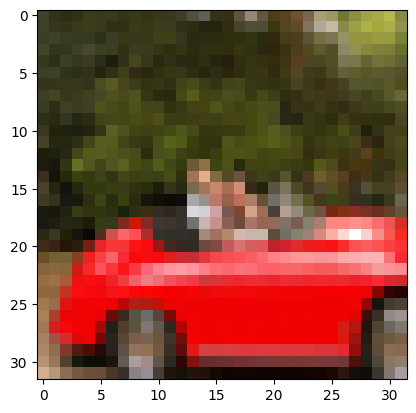

In [5]:
#이미지 시각화 하기
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [6]:
#텐서(넘파이에서는 배열)로 변환하는 단계
from torchvision import transforms
dir(transforms)

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [7]:
#모든 CIFAR10 데이터를 텐서로 변환
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [8]:
#데이터 타입 확인
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [9]:
#img_t는 RGB 세 개의 채널을 가진 컬러에다 32*32 이미지이며 정규화된 이미지 텐서는 32bit 실수형이다.
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [10]:
#정규화된 이미지 텐서 확인
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

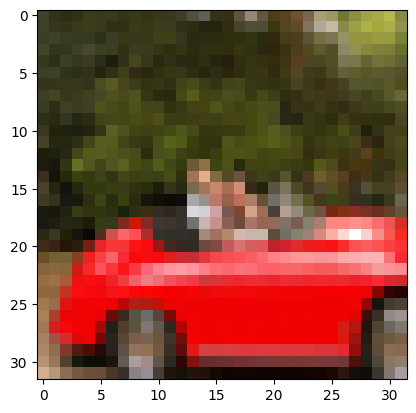

In [11]:
#permute한 이유: 파이토치는 [채널, 높이, 너비]순으로 저장하지만, 
#matplotlib은 [높이, 너비, 채널]순으로 저장하고 읽어들이므로, 
#치환(permutation)해서 동일한 이미지를 출력하려고 하기 때문
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [12]:
'''stack은 직역하면 '쌓다'라는 의미로, 여러 장의 이미지들을 하나의 책처럼 쌓아올린다는 문법'''
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [13]:
#reshape랑 비슷한 맥락으로, 채널(RGB) 세 개는 유지하고, -1은 지정한 차원의 크기에 따라 평균을 자동으로 계산한다.
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [14]:
#위와 비슷한 맥락으로, 지정한 차원의 크기에 따라 표준편차를 구한다.
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [15]:
#텐서 정규화 준비
transforms.Normalize((0.4914, 0.4822, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4468), std=(0.247, 0.2435, 0.2616))

In [16]:
#모든 CIFAR10 데이터셋 텐서들을 정규화
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4468), (0.2470, 0.2435, 0.2616))]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802876..2.1264887].


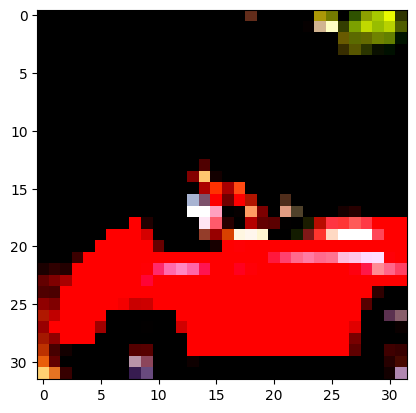

In [17]:
#정규화가 되었기 때문에 RGB 채널 값이 0.0~1.0 사이 범위로 만들었기 때문에, 배경화면이 검은색으로 나타났을 뿐이지만, 동일한 이미지다.
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1,2,0))
plt.show()